In [1]:
import numpy as np
import pandas as pd
import cv2
from PIL import Image, ImageEnhance ,ImageFilter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df_mini = pd.read_csv('../datos/grabacion/datos_bo3_minimapa.csv')
df_pov = pd.read_csv('../datos/grabacion/datos_bo3_pov.csv')

In [11]:
df_mini.head()

,mini_01,mini_02,mini_03,mini_04,mini_05,mouse_final
0,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,"[384, 29]"
2,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,"[543, 20]"
5,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-2...,"[0, 0]"
9,datos/grabacion/mini_mapa/mini_mapa_27-14-18-2...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-2...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-2...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-2...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-2...,"[0, 0]"
14,datos/grabacion/mini_mapa/mini_mapa_27-14-18-2...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-2...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-2...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-2...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-2...,"[-33, 4]"


In [10]:
df_pov.head()

,pov_01,pov_02,pov_03,pov_04,pov_05,mouse_final
0,datos/grabacion/pov/pov_27-14-18-16-934971.jpg,datos/grabacion/pov/pov_27-14-18-17-152061.jpg,datos/grabacion/pov/pov_27-14-18-17-363579.jpg,datos/grabacion/pov/pov_27-14-18-17-575999.jpg,datos/grabacion/pov/pov_27-14-18-17-791343.jpg,"[384, 29]"
2,datos/grabacion/pov/pov_27-14-18-18-147341.jpg,datos/grabacion/pov/pov_27-14-18-18-370973.jpg,datos/grabacion/pov/pov_27-14-18-18-583829.jpg,datos/grabacion/pov/pov_27-14-18-18-795783.jpg,datos/grabacion/pov/pov_27-14-18-19-013757.jpg,"[543, 20]"
5,datos/grabacion/pov/pov_27-14-18-19-235320.jpg,datos/grabacion/pov/pov_27-14-18-19-458211.jpg,datos/grabacion/pov/pov_27-14-18-19-679642.jpg,datos/grabacion/pov/pov_27-14-18-19-897923.jpg,datos/grabacion/pov/pov_27-14-18-20-110498.jpg,"[0, 0]"
9,datos/grabacion/pov/pov_27-14-18-20-333720.jpg,datos/grabacion/pov/pov_27-14-18-20-545804.jpg,datos/grabacion/pov/pov_27-14-18-20-759576.jpg,datos/grabacion/pov/pov_27-14-18-20-975597.jpg,datos/grabacion/pov/pov_27-14-18-21-191251.jpg,"[0, 0]"
14,datos/grabacion/pov/pov_27-14-18-21-415466.jpg,datos/grabacion/pov/pov_27-14-18-21-633860.jpg,datos/grabacion/pov/pov_27-14-18-21-851859.jpg,datos/grabacion/pov/pov_27-14-18-22-069234.jpg,datos/grabacion/pov/pov_27-14-18-22-283210.jpg,"[-33, 4]"


In [7]:
print(df_mini.shape)
print(df_pov.shape)

(722997, 6)
(722997, 6)


In [8]:
#Eliminamos duplicados
df_mini.drop_duplicates(inplace=True)
df_pov.drop_duplicates(inplace=True)

In [9]:
print(df_mini.shape)
print(df_pov.shape)

(1201, 6)
(1201, 6)


In [12]:
import ast
# Convertir la columna de tipo object a listas de enteros
df_mini['mouse_final'] = df_mini['mouse_final'].apply(ast.literal_eval)
df_pov['mouse_final'] = df_pov['mouse_final'].apply(ast.literal_eval)

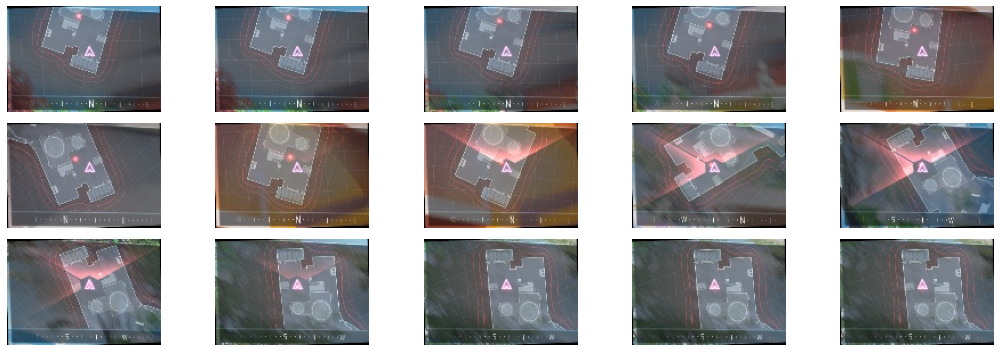

In [13]:
fig, axes = plt.subplots(3, 5, figsize=(15, 5))

for i in range(3): 
    for j in range(5):
        # Obtener la ruta de la imagen
        ruta_imagen = df_mini.iloc[i, j]  # Elimina los corchetes
        
        # Abrir la imagen y convertirla a matriz numpy
        imagen = Image.open("../" + ruta_imagen)
        matriz_np = np.array(imagen)
        
        # Mostrar la imagen en el subplot correspondiente
        axes[i, j].imshow(matriz_np)
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

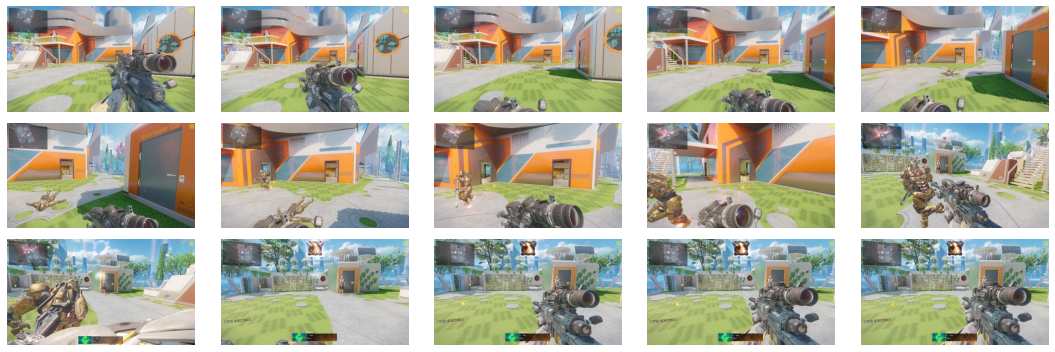

In [14]:
fig, axes = plt.subplots(3, 5, figsize=(15, 5))

for i in range(3): 
    for j in range(5):
        # Obtener la ruta de la imagen
        ruta_imagen = df_pov.iloc[i, j]  # Elimina los corchetes
        
        # Abrir la imagen y convertirla a matriz numpy
        imagen = Image.open("../" + ruta_imagen)
        matriz_np = np.array(imagen)
        
        # Mostrar la imagen en el subplot correspondiente
        axes[i, j].imshow(matriz_np)
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

Tamaño imagen -> (135, 93)
Tamaño matriz -> (93, 135, 3)


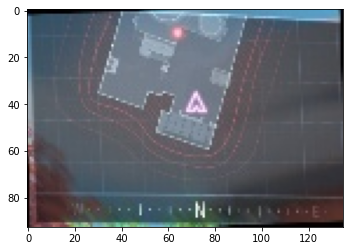

In [15]:
primera_fila = df_mini.iloc[0]
imagen = Image.open("../" +str(primera_fila.iloc[1]))
matriz_np = np.array(imagen)  
print("Tamaño imagen -> "+str(imagen.size))
print("Tamaño matriz -> "+ str(matriz_np.shape))
plt.imshow(matriz_np)
plt.axis('on')
plt.show()

Tamaño imagen -> (640, 360)
Tamaño matriz -> (360, 640, 3)


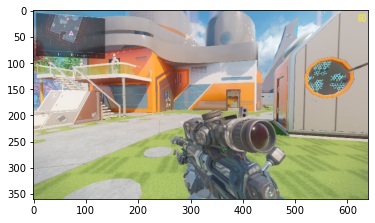

In [17]:
primera_fila = df_pov.iloc[0]
imagen = Image.open("../" +str(primera_fila.iloc[1]))
matriz_np = np.array(imagen)  
print("Tamaño imagen -> "+str(imagen.size))
print("Tamaño matriz -> "+ str(matriz_np.shape))
plt.imshow(matriz_np)
plt.axis('on')
plt.show()

# Funcion Del Batch

In [34]:
from keras.utils import Sequence

class ImageDataGenerator(Sequence):
    def __init__(self, df , sequence_length ,image_height , image_width , batch_size, filtro, **kwargs):
        self.df = df
        self.image_sequence_length = sequence_length
        self.image_height = image_height
        self.image_width = image_width
        self.batch_size = batch_size
        self.filtro_SHARPEN = filtro
        super().__init__(**kwargs)  # Llamada al constructor de la clase base
        
    def __len__(self):
        return int(np.ceil(len(self.df) / float(self.batch_size)))
    
    def cargar_todo(self,fin_df):
        batch_df = self.df.iloc[0:fin_df]     #Obtenemos un lote del df
        
        X_batch = np.zeros((len(batch_df), self.image_sequence_length ,self.image_height, self.image_width, 3))  # Inicializar matriz para las imágenes
        y_batch = np.array(batch_df['mouse_final'].tolist())
        
        for i, (_, row) in enumerate(batch_df.iterrows()):
            frames = []
            for j in range(self.image_sequence_length):
                imagen = Image.open("../" + row.iloc[j])    # Obtener la ruta de la imagen
                imagen = Image.fromarray(np.array(imagen)).filter(ImageFilter.SHARPEN)  #Aplicamos Filtro SHARPEN
                imagen = np.array(imagen) / 255.0           # Normalizar la imagen

                frames.append(imagen)                  #Juntamos frames en lista
            video = np.stack(frames, axis=0)           # Convertir lista de frames en un video np
            X_batch[i] = video
        
        return X_batch, y_batch
    
    def __getitem__(self, index):
        inicio_lote = index * self.batch_size
        final_lote = (index + 1) * self.batch_size
        
        batch_df = self.df.iloc[inicio_lote:final_lote]     #Obtenemos un lote del df
        
        X_batch = np.zeros((len(batch_df), self.image_sequence_length ,self.image_height, self.image_width, 3))  # Inicializar matriz para las imágenes
        y_batch = np.array(batch_df['mouse_final'].tolist())
        
        for i, (_, row) in enumerate(batch_df.iterrows()):
            frames = []
            for j in range(self.image_sequence_length):
                imagen = Image.open("../" + row.iloc[j])    # Obtener la ruta de la imagen
                imagen = Image.fromarray(np.array(imagen))
                
                if self.filtro_SHARPEN == True :
                    imagen = imagen.filter(ImageFilter.SHARPEN)  #Aplicamos Filtro SHARPEN
                    
                imagen = np.array(imagen) / 255.0           # Normalizar la imagen

                frames.append(imagen)                  #Juntamos frames en lista
            video = np.stack(frames, axis=0)           # Convertir lista de frames en un video np
            X_batch[i] = video
        
        return X_batch, y_batch

def comprobar_contenido(X_train , Y_train , num_video):

    fig, axs = plt.subplots(1, 5, figsize=(5 * 2, 1 * 2))

    for i in range(5):
        axs[i].imshow(X_train[num_video][i])
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()
    print("Etiqueta -> "+ str(Y_train[num_video]))
    return Y_train[num_video]

# PREPARACIÒN ENTRENAMIENTO

## Train Split

In [22]:
# Modelo Mini-Mapa
X_train_Mapa, X_test_Mapa = train_test_split(df_mini, test_size=0.2, random_state=42)
X_train_Mapa, X_valid_Mapa = train_test_split(X_train_Mapa, test_size=0.25, random_state=42)

print("Tamaño total: ",len(df_mini))
print("Tamaño del conjunto de entrenamiento:", len(X_train_Mapa))
print("Tamaño del conjunto de prueba:", len(X_test_Mapa))
print("Tamaño del conjunto de validación:", len(X_valid_Mapa))

Tamaño total:  1201
Tamaño del conjunto de entrenamiento: 720
Tamaño del conjunto de prueba: 241
Tamaño del conjunto de validación: 240


In [23]:
# Modelo POV
X_train_Pov, X_test_Pov = train_test_split(df_pov, test_size=0.2, random_state=42)
X_train_Pov, X_valid_Pov = train_test_split(X_train_Pov, test_size=0.25, random_state=42)

print("Tamaño total: ",len(df_pov))
print("Tamaño del conjunto de entrenamiento:", len(X_train_Pov))
print("Tamaño del conjunto de prueba:", len(X_test_Pov))
print("Tamaño del conjunto de validación:", len(X_valid_Pov))

Tamaño total:  1201
Tamaño del conjunto de entrenamiento: 720
Tamaño del conjunto de prueba: 241
Tamaño del conjunto de validación: 240


# Generadores

In [27]:
# Generador Mapa

altura_img_mini = 93
anchura_img_mini = 135
batch_size = 4 #videos por batch

# Generadores de Batches Mini-Mapa
train_generator_Mapa = ImageDataGenerator(X_train_Mapa, sequence_length=5, image_height=altura_img_mini, image_width=anchura_img_mini, batch_size=batch_size ,True)
test_generator_Mapa = ImageDataGenerator(X_test_Mapa, sequence_length=5, image_height=altura_img_mini, image_width=anchura_img_mini, batch_size=batch_size ,True)
valid_generator_Mapa = ImageDataGenerator(X_valid_Mapa, sequence_length=5, image_height=altura_img_mini, image_width=anchura_img_mini, batch_size=batch_size ,True)

180


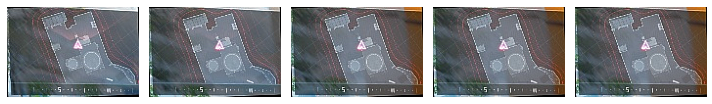

Etiqueta -> [0 0]


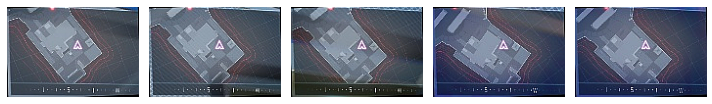

Etiqueta -> [-54  -2]


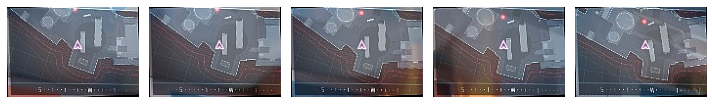

Etiqueta -> [2 0]


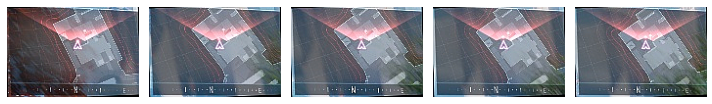

Etiqueta -> [-1  1]


In [28]:
#Cantidad de batches en los que se divide el df
print(train_generator_Mapa.__len__())

#Comprobamos funcionamiento bach
X_batch, y_batch = train_generator_Mapa.__getitem__(2)

for i in range(0,batch_size):  # 4 es el maximo de conjunto de imagenes del batch creado
    # Seleccionamos ver la posicion numero 0 del batch creado
    comprobar_contenido(X_batch , y_batch,i)

In [29]:
# Generador Pov
altura_img_mini = 360
anchura_img_mini = 640
batch_size = 2 #videos por batch

# Generadores de Batches Mini-Mapa
train_generator_Pov = ImageDataGenerator(X_train_Pov, sequence_length=5, image_height=altura_img_mini, image_width=anchura_img_mini, batch_size=batch_size ,True)
test_generator_Pov = ImageDataGenerator(X_test_Pov, sequence_length=5, image_height=altura_img_mini, image_width=anchura_img_mini, batch_size=batch_size ,True)
valid_generator_Pov = ImageDataGenerator(X_valid_Pov, sequence_length=5, image_height=altura_img_mini, image_width=anchura_img_mini, batch_size=batch_size ,True)

360


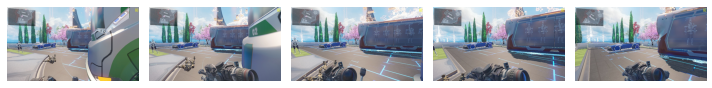

Etiqueta -> [3 0]


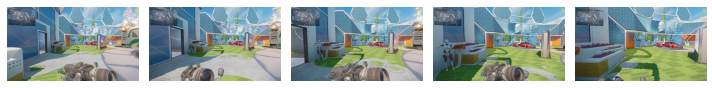

Etiqueta -> [-14   4]


In [35]:
#Cantidad de batches en los que se divide el df
print(train_generator_Pov.__len__())

#Comprobamos funcionamiento bach
X_batch, y_batch = train_generator_Pov.__getitem__(0)

for i in range(0,batch_size):  # 2 es el maximo de conjunto de imagenes del batch creado
    # Seleccionamos ver la posicion numero 0 del batch creado
    comprobar_contenido(X_batch , y_batch,i)

# Modelo - Entreno

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Model ,Sequential
from tensorflow.keras.layers import Input, TimeDistributed, MaxPooling2D, Flatten, Dense ,ConvLSTM2D, Dropout,Concatenate
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
def creacion_modelo_convLSTM(input_shape_mapa , input_shape_pov):
    
    #Entrada input videos
    input_shape_mapa = Input(shape=input_shape_mapa)
    input_shape_pov = Input(shape=input_shape_pov)
    
    # Capa ConvLSTM_mapa
    conv_lstm_mapa = ConvLSTM2D(filters= 248, kernel_size=(3, 3), 
                                    activation='relu', 
                                    padding='same',
                                    return_sequences=True)(input_shape_mapa)
    pooled_mapa = TimeDistributed(MaxPooling2D(pool_size=(2, 2)))(conv_lstm_mapa)
    dropout_mapa = TimeDistributed(Dropout(0.2))(pooled_mapa)
    
    # Capa ConvLSTM_pov
    conv_lstm_pov = ConvLSTM2D(filters= 248, kernel_size=(3, 3), 
                                    activation='relu', 
                                    padding='same',
                                    return_sequences=True)(input_shape_pov)
    pooled_pov = TimeDistributed(MaxPooling2D(pool_size=(2, 2)))(conv_lstm_pov)
    dropout_pov = TimeDistributed(Dropout(0.2))(pooled_mapa)

    
    
    # Aplanar las salidas de ConvLSTM2D
    flat1 = Flatten()(dropout_mapa)
    flat2 = Flatten()(dropout_pov)
    
    # Concatenar las características aplanadas
    merged_features = Concatenate()([flat1, flat2])
    
    # Capa densa
    dense_out = Dense(248, activation='relu')(merged_features)
    
    #Capa Salida
    output = Dense(2, activation='linear')(dense_out)

In [39]:
# Modelo Mini-Mapa
timesteps = 5
height = 93
width = 135
channels = 3
input_shape_mapa = (timesteps, height, width, channels)

# Modelo Pov
timesteps = 5
height = 360
width = 640
channels = 3
input_shape_pov = (timesteps, height, width, channels)

creacion_modelo_convLSTM(input_shape_mapa,input_shape_pov)

2024-06-28 14:54:13.645230: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-28 14:54:13.668885: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-28 14:54:13.669043: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

NameError: name 'Concatenate' is not defined